In [325]:
import pandas as pd
import seaborn as sns

In [326]:
df = sns.load_dataset('titanic')

In [327]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**survived**: Survival (0 = No, 1 = Yes)

**pclass**: Ticket class (1 = First, 2 = Second, 3 = Third)

**sex**: Gender of the passenger (male/female)

**age**: Age in years (can have missing values)

**sibsp**: Number of siblings or spouses aboard the Titanic

**parch**: Number of parents or children aboard the Titanic

**fare**: Fare paid for the ticket (British pound)

**embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**class**: Ticket class as a string (First, Second, Third)

**who**: Whether the person is man, woman, or child (based on age/sex)

**adult_male**: Whether the person is an adult male (True/False)

**deck**: Deck where the cabin was located (A–G, or NaN if unknown)

**embark_town**: Town where passenger boarded the ship

**alive**: Survival status as string (“yes” = survived, “no” = did not survive)

**alone**: True if the passenger was alone (no family aboard), otherwise False



In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [329]:
df['survived'].value_counts()  # we have data on death more by a count 100 approx. its a little biased

,count
survived,
0,549
1,342


In [330]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Have missing values in columns:


*   Age 177
*   embarked 2


*   deck 688
*   embarked_town 2





In [331]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [332]:
# checking for dupes
df.duplicated().sum()

np.int64(107)

107 duplicate values

In [333]:
# droping duplicates
df.drop_duplicates(inplace=True)

### dealing with missing value

In [334]:
df['age'].describe()

,age
count,678.000000
mean,29.869351
std,14.759076
min,0.420000
25%,20.000000
50%,28.250000
75%,39.000000
max,80.000000


In [335]:
df['deck'].info()

<class 'pandas.core.series.Series'>
Index: 784 entries, 0 to 890
Series name: deck
Non-Null Count  Dtype   
--------------  -----   
202 non-null    category
dtypes: category(1)
memory usage: 7.2 KB


Its not a good idea to imput almost 87% of synthetic data. Its better to drop this cloumn.

if data pretaining to this specific column is needed in analysis part , for the analysis to hold true. this column's data needs to be collected again. No other way out

In [336]:
df.drop('deck',axis=1,inplace=True)

<Axes: xlabel='age', ylabel='Count'>

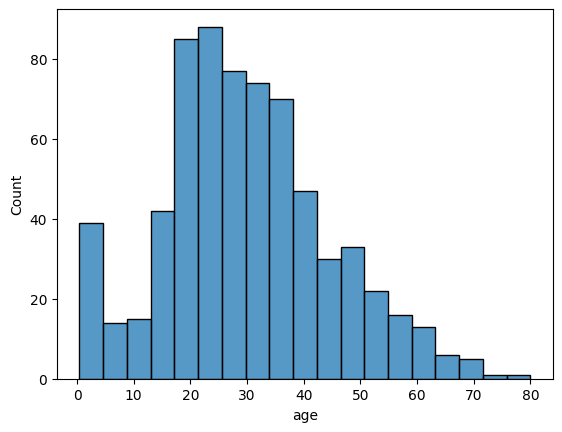

In [337]:
sns.histplot(df['age'])

- Younger people between 20-40 are more prominant here
- right skewed data i.e, lesser count of people beyond 40 years of age relatively.
- decided to impute mode instaed of mean as it would represent the actual data distribution

In [338]:
# imputing mode value in age column

df['age']=df['age'].fillna(df['age'].mode())

In [339]:
df['age'].mode()

,age
0,24.0


In [340]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [341]:
df['embark_town'].describe()

,embark_town
count,782
unique,3
top,Southampton
freq,568


In [342]:
# As southhampton is most frequent we will impute with it
df['embarked']=df['embarked'].fillna('S')
df['embark_town']=df['embark_town'].fillna('Southampton')

its eseentialy the same column emarked and embark_town we can remove one of them

In [343]:
df.drop('embarked',axis=1,inplace=True)

### Redundant Column Handling

**Decision: Dropped `embarked` column**

**Reasoning:**
- `embarked` (codes: S, C, Q) and `embark_town` (Southampton, Cherbourg, Queenstown)
  contain identical information.
- `embark_town` is more interpretable for visualization and analysis.
- Keeping both would introduce redundancy without analytical benefit.
- Industry best practice: Remove perfect redundancy during cleaning phase
  to simplify downstream analysis and modeling.


In [344]:
# pclass and class
df.drop('pclass',axis=1,inplace=True)

# i droped the pclass as class is more interpretable who will study data and encode it later before modelling

In [345]:
# who is the derivative of age and sex hence dropping it too
df.drop('who',axis=1,inplace=True)

In [346]:
# adult_male is also derivative of age and sex dropping it
df.drop('adult_male',axis=1,inplace=True)

In [347]:
# survived and alive is redundant too
df.drop('alive',axis=1,inplace=True)

### check for datatypes

In [348]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,Southampton,True


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   sex          784 non-null    object  
 2   age          678 non-null    float64 
 3   sibsp        784 non-null    int64   
 4   parch        784 non-null    int64   
 5   fare         784 non-null    float64 
 6   class        784 non-null    category
 7   embark_town  784 non-null    object  
 8   alone        784 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(2)
memory usage: 50.7+ KB


In [350]:
# converting object columns to category
col_list = ['sex', 'embark_town','class']
for col in col_list:
    df[col] = df[col].astype('category')


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   sex          784 non-null    category
 2   age          678 non-null    float64 
 3   sibsp        784 non-null    int64   
 4   parch        784 non-null    int64   
 5   fare         784 non-null    float64 
 6   class        784 non-null    category
 7   embark_town  784 non-null    category
 8   alone        784 non-null    bool    
dtypes: bool(1), category(3), float64(2), int64(3)
memory usage: 40.2 KB


## checking for outliers

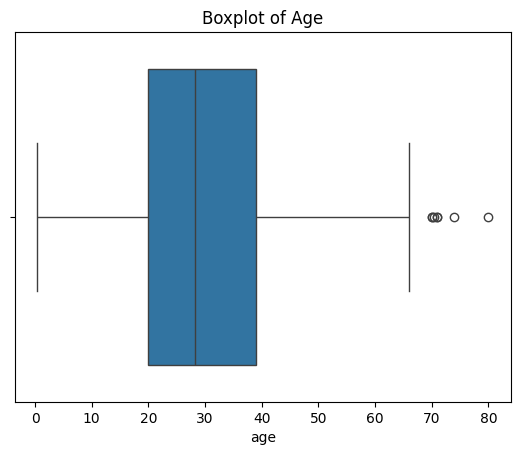

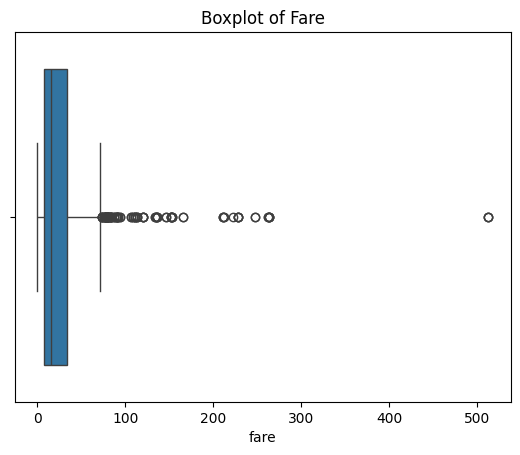

In [352]:

import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare')
plt.show()


In [353]:
# Finding the outliers in age
q1_age = df['age'].quantile(0.25)
q3_age = df['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age

age_outliers = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
print(age_outliers[['age', 'fare', 'sex','class']])


      age     fare   sex   class
96   71.0  34.6542  male   First
116  70.5   7.7500  male   Third
493  71.0  49.5042  male   First
630  80.0  30.0000  male   First
672  70.0  10.5000  male  Second
745  70.0  71.0000  male   First
851  74.0   7.7750  male   Third


In [354]:
age_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 96 to 851
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     7 non-null      int64   
 1   sex          7 non-null      category
 2   age          7 non-null      float64 
 3   sibsp        7 non-null      int64   
 4   parch        7 non-null      int64   
 5   fare         7 non-null      float64 
 6   class        7 non-null      category
 7   embark_town  7 non-null      category
 8   alone        7 non-null      bool    
dtypes: bool(1), category(3), float64(2), int64(3)
memory usage: 752.0 bytes


In [355]:
age_outliers[age_outliers['age']<lower_bound_age]


,survived,sex,age,sibsp,parch,fare,class,embark_town,alone


In [356]:
age_outliers[age_outliers['age']>upper_bound_age]

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
96,0,male,71.0,0,0,34.6542,First,Cherbourg,True
116,0,male,70.5,0,0,7.7500,Third,Queenstown,True
493,0,male,71.0,0,0,49.5042,First,Cherbourg,True
630,1,male,80.0,0,0,30.0000,First,Southampton,True
672,0,male,70.0,0,0,10.5000,Second,Southampton,True
745,0,male,70.0,1,1,71.0000,First,Southampton,False
851,0,male,74.0,0,0,7.7750,Third,Southampton,True


There are 39 outliers in total in age columns as looking at the values at age column there is no such absurd number. But we can either cap or remove certain entries when in modeling phase respective to the performance impact.

In [357]:
# outliers in fares
q1_fare = df['fare'].quantile(0.25)
q3_fare = df['fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare

fare_outliers = df[(df['fare'] < lower_bound_fare) | (df['fare'] > upper_bound_fare)]
print(fare_outliers[['age', 'fare', 'sex', 'class']])


      age      fare     sex  class
27   19.0  263.0000    male  First
31    NaN  146.5208  female  First
34   28.0   82.1708    male  First
52   49.0   76.7292  female  First
61   38.0   80.0000  female  First
..    ...       ...     ...    ...
829  62.0   80.0000  female  First
835  39.0   83.1583  female  First
849   NaN   89.1042  female  First
856  45.0  164.8667  female  First
879  56.0   83.1583  female  First

[102 rows x 4 columns]


102 outlliers and all are beyond upper bound

In [358]:
fare_outliers[fare_outliers['fare']>upper_bound_fare]

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
27,0,male,19.0,3,2,263.0000,First,Southampton,False
31,1,female,NaN,1,0,146.5208,First,Cherbourg,False
34,0,male,28.0,1,0,82.1708,First,Cherbourg,False
52,1,female,49.0,1,0,76.7292,First,Cherbourg,False
61,1,female,38.0,0,0,80.0000,First,Southampton,True
...,...,...,...,...,...,...,...,...,...
829,1,female,62.0,0,0,80.0000,First,Southampton,True
835,1,female,39.0,1,1,83.1583,First,Cherbourg,False
849,1,female,NaN,1,0,89.1042,First,Cherbourg,False
856,1,female,45.0,1,1,164.8667,First,Southampton,False


<Axes: xlabel='fare', ylabel='Count'>

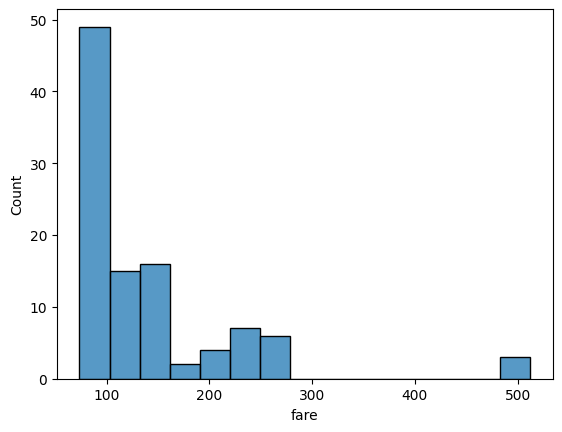

In [359]:
sns.histplot(fare_outliers['fare'])

In [360]:
fare_outliers[fare_outliers['fare'] >400]

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
258,1,female,35.0,0,0,512.3292,First,Cherbourg,True
679,1,male,36.0,0,1,512.3292,First,Cherbourg,False
737,1,male,35.0,0,0,512.3292,First,Cherbourg,True


there are 3 passanger boarded from cherbourg paid exactly outrageous amout of 512.3292(extreme outlier) for first class. One can a couple and one might be alone.

Can be a last minute booking hence such high fare. Can remove these 3 entries for model training

In [361]:
df.describe()

,survived,age,sibsp,parch,fare
count,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,29.869351,0.522959,0.415816,34.711740
std,0.492507,14.759076,0.986231,0.836922,52.160151
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   sex          784 non-null    category
 2   age          678 non-null    float64 
 3   sibsp        784 non-null    int64   
 4   parch        784 non-null    int64   
 5   fare         784 non-null    float64 
 6   class        784 non-null    category
 7   embark_town  784 non-null    category
 8   alone        784 non-null    bool    
dtypes: bool(1), category(3), float64(2), int64(3)
memory usage: 40.2 KB


In [363]:
# saving the csv file
df.to_csv('Cleaned_titanic.csv', index = False)
print('Cleaned data achieved')
print(f"Final shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Cleaned data achieved
Final shape: (784, 9)
Columns: ['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'embark_town', 'alone']
